In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Load Data

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
submit = pd.read_csv('sample_submission.csv')

In [5]:
target = df_train['Rings']

## EDA 

In [6]:
df_train.head(3)

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F    0.55      0.43   0.150        0.7715          0.3285   
1   1   F    0.63      0.49   0.145        1.1300          0.4580   
2   2   I    0.16      0.11   0.025        0.0210          0.0055   

   Whole weight.2  Shell weight  Rings  
0          0.1465         0.240     11  
1          0.2765         0.320     11  
2          0.0030         0.005      6

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [8]:
df_train.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

In [9]:
df_test.describe()

id        Length      Diameter        Height  Whole weight  \
count   60411.000000  60411.000000  60411.000000  60411.000000  60411.000000   
mean   120820.000000      0.517428      0.401961      0.135751      0.790062   
std     17439.297893      0.117609      0.097470      0.038175      0.457591   
min     90615.000000      0.075000      0.055000      0.000000      0.002000   
25%    105717.500000      0.450000      0.345000      0.110000      0.419500   
50%    120820.000000      0.545000      0.425000      0.140000      0.801500   
75%    135922.500000      0.600000      0.470000      0.160000      1.070000   
max    151025.000000      0.800000      0.650000      1.095000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight  
count    60411.000000    60411.000000  60411.000000  
mean         0.341227        0.169419      0.226125  
std          0.204221        0.100720      0.129826  
min          0.001000        0.000500      0.001500  
25%          0.178500        0.086500      0.120000  
50%          0.329000        0.166000      0.225000  
75%          0.464500        0.232500      0.305000  
max          1.488000        0.641500      1.004000

In [10]:
print('Train data NA or NaN\n')
print(f'{df_train.isna().sum()}\n\n')

print('Test data NA or Nan\n ')
print(df_test.isna().sum())

Train data NA or NaN

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


Test data NA or Nan
 
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


In [11]:
df_train['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [12]:
df_test['Sex'].value_counts()

Sex
I    22241
M    20783
F    17387
Name: count, dtype: int64

In [14]:
columns = df_train.columns.drop(['id','Sex', 'Rings'])

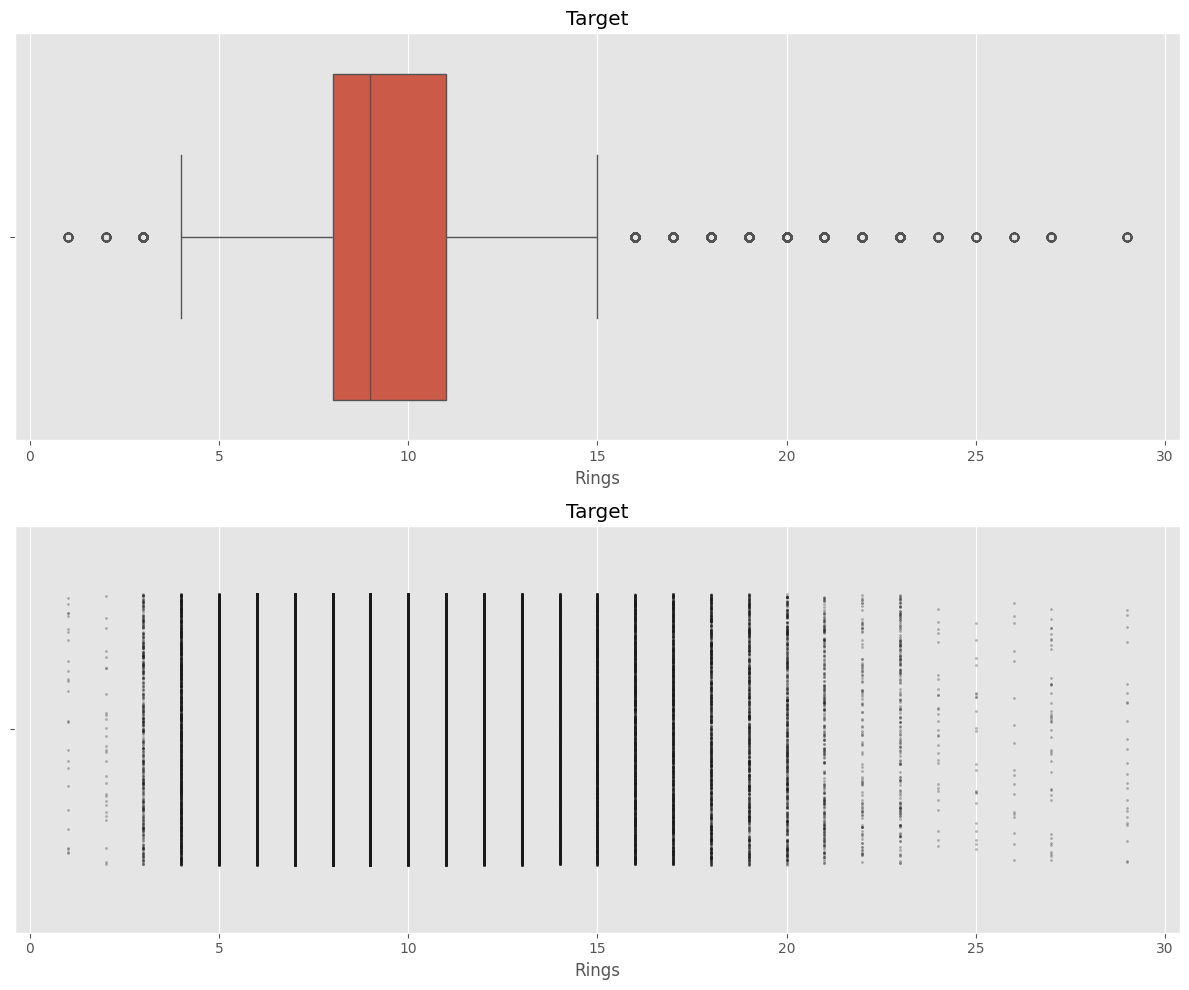

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
sns.boxplot(df_train['Rings'], orient="h",  ax=axs[0]).set(title='Target')
sns.stripplot(df_train['Rings'], size=2, color=".1", orient="h", alpha=0.3, ax=axs[1]).set(title='Target')
axs[1].set_ylim(-0.15,0.15)
fig.tight_layout()

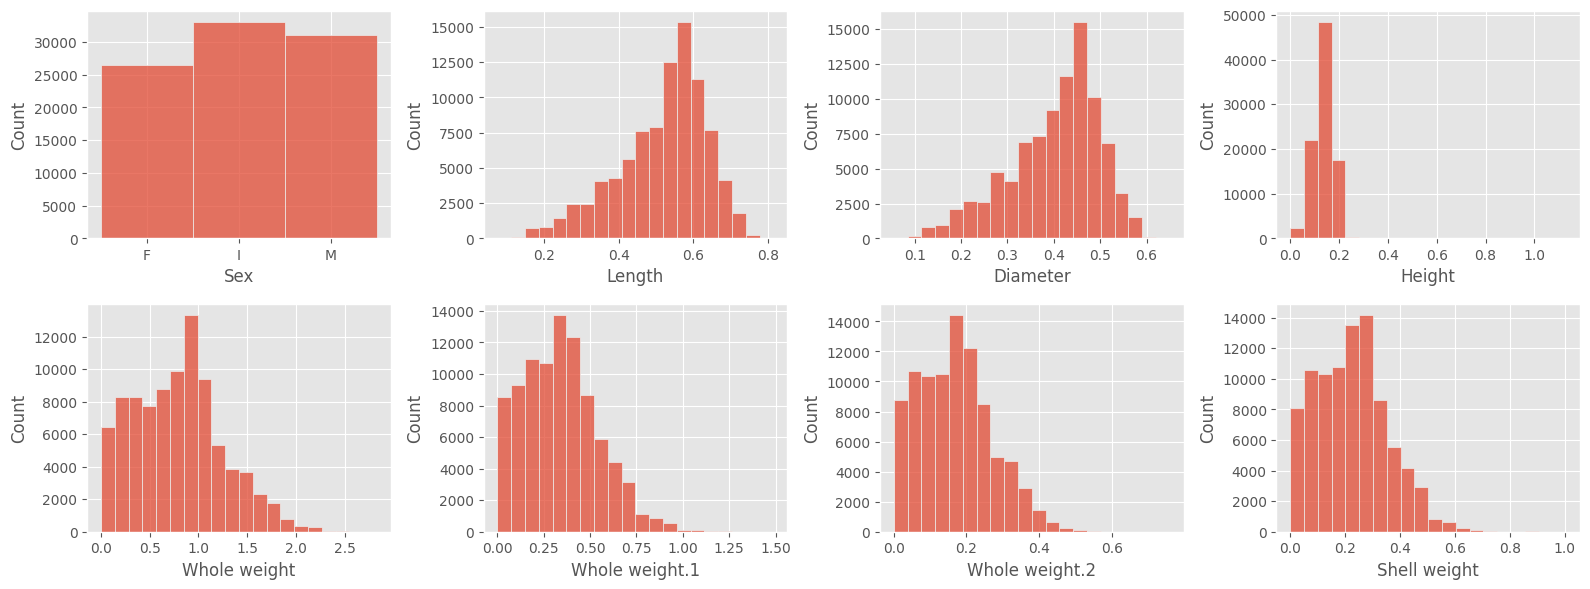

In [16]:
n_rows = 2
n_cols = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
for i in range(8):
    ax = axs[i // n_cols, i % n_cols]
    _ = sns.histplot(df_train, x=df_train.columns[i + 1], bins = 20, ax=ax)
fig.tight_layout()

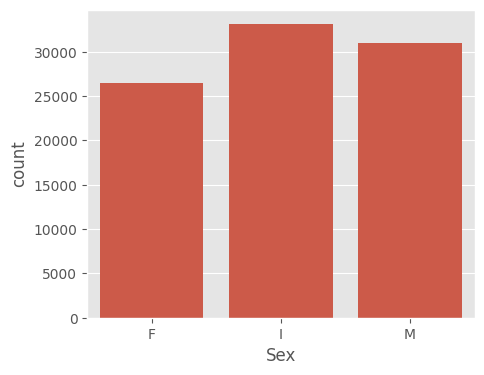

In [17]:
fig= plt.figure( figsize=(5, 4))
s = sns.countplot(df_train, x='Sex')


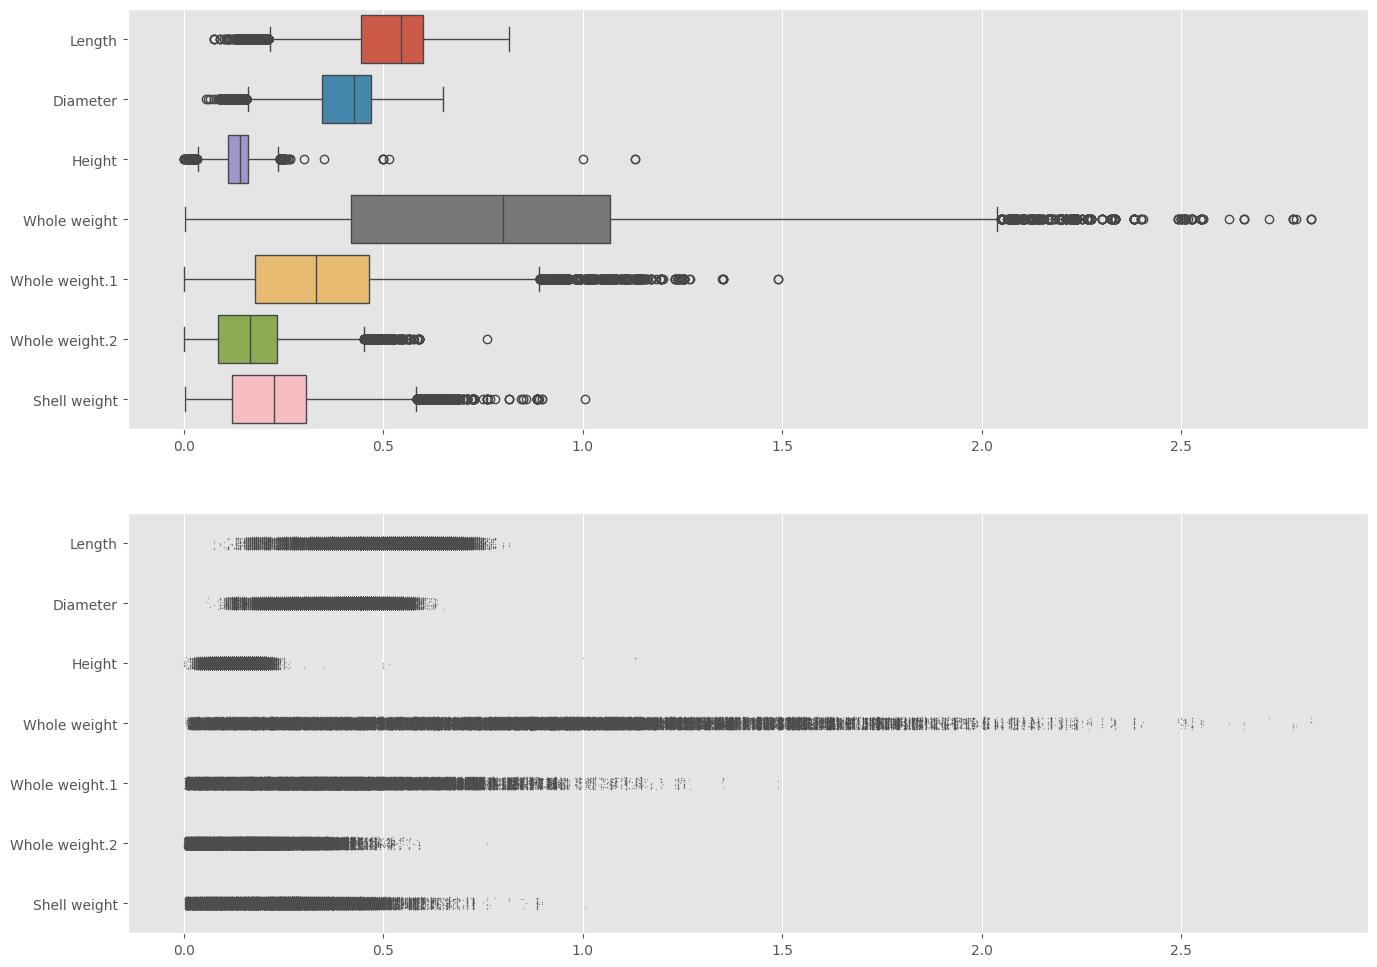

In [18]:
fig,axs = plt.subplots(2, 1, figsize=(16, 12))
s=sns.boxplot(df_train[columns],  orient="h", ax=axs[0])
s=sns.stripplot(df_train[columns], size=1, color=".3", orient="h", alpha=0.5, ax=axs[1])

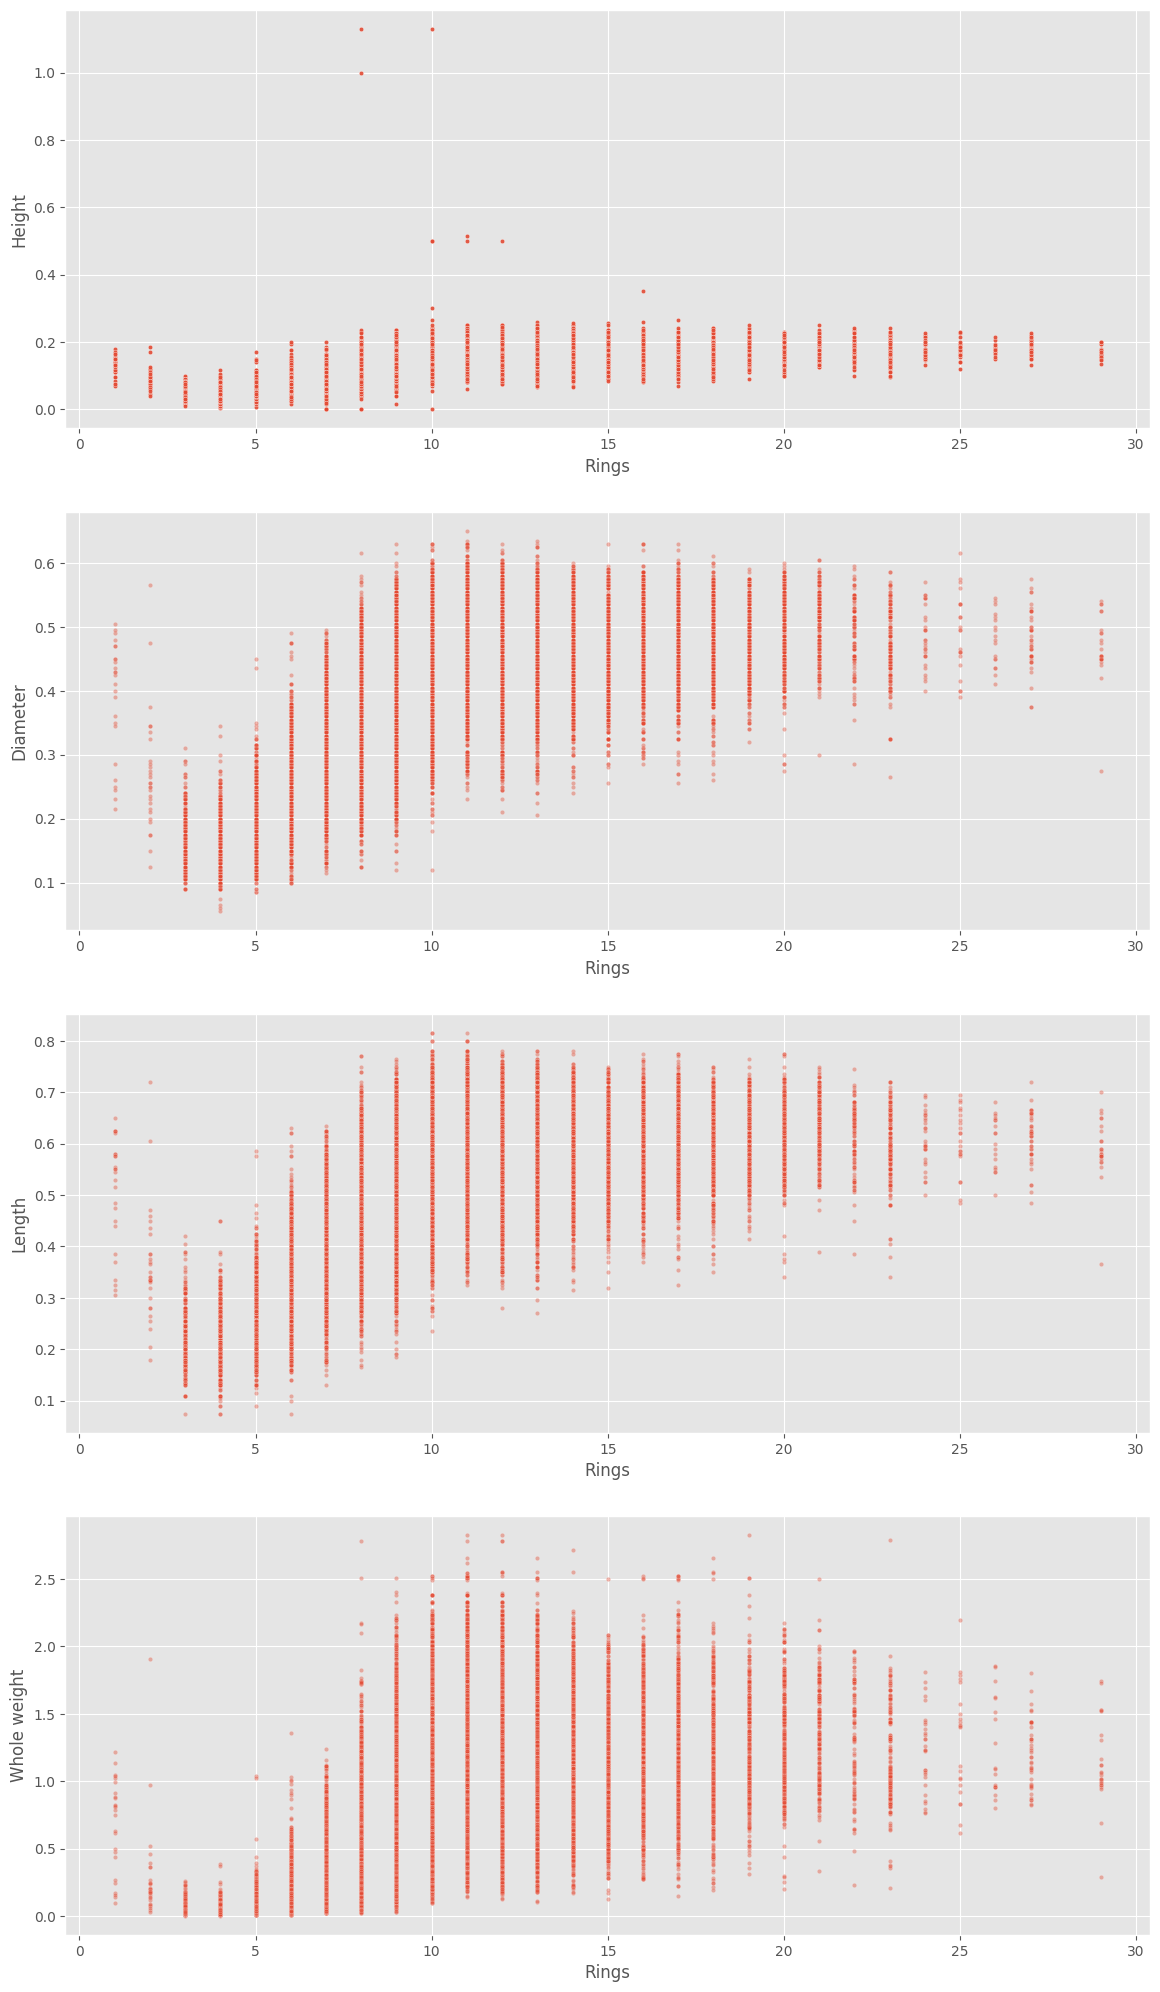

In [19]:
fig, axs =  plt.subplots(4, 1, figsize=(14,25))
s = sns.scatterplot(data=df_train, x='Rings', y='Height', s=10, alpha=0.9, ax=axs[0])
s = sns.scatterplot(data=df_train, x='Rings', y='Diameter', s=10, alpha=0.4, ax=axs[1])
s = sns.scatterplot(data=df_train, x='Rings', y='Length', s=10, alpha=0.4, ax=axs[2])
s = sns.scatterplot(data=df_train, x='Rings', y='Whole weight', s=10, alpha=0.4, ax=axs[3])

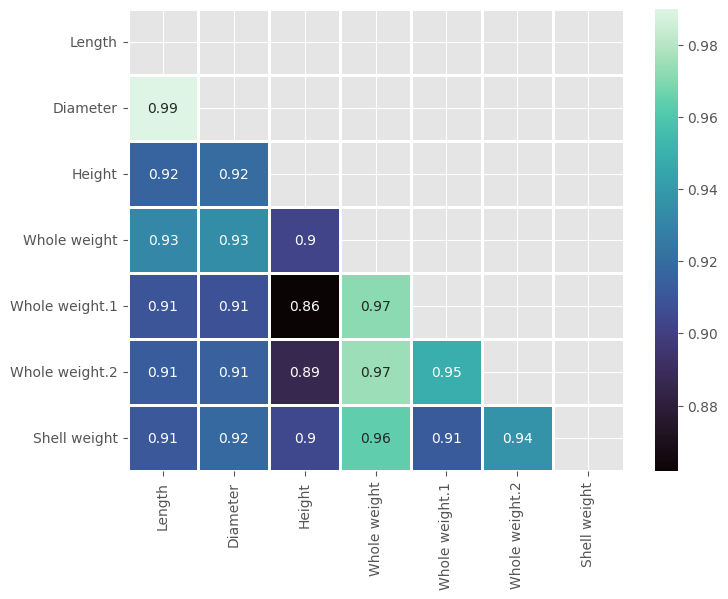

In [20]:
fig =plt.figure(figsize = (8, 6))

corr = df_train[columns].corr(method='pearson')
mask_train = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask_train, cmap='mako', annot=True, linewidth=1)

# Uncomment these lines if there is data with a correlation of about to 0
# for t in ax.texts:
#     if float(t.get_text()) >=0.6 or float(t.get_text()) <= -0.6:
#         t.set_text(t.get_text())
#     else:
#         t.set_text('')

## Feature Engineering 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])

In [23]:
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)

In [24]:
df_train[['Sex_1', 'Sex_2']] =df_train[['Sex_1', 'Sex_2']].astype(int)
df_test[['Sex_1', 'Sex_2']] =df_test[['Sex_1', 'Sex_2']].astype(int)

In [25]:
df_train[df_train['Height']>0.25]['Height'].count()

16

In [26]:
df_train = df_train.loc[df_train['Height']<0.25]

In [27]:
df_train[df_train['Whole weight']>2.4]['Whole weight'].count()

60

In [28]:
df_train = df_train.loc[df_train['Whole weight']<2.4]

In [29]:
df_train

id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0          0   0.550     0.430   0.150        0.7715          0.3285   
1          1   0.630     0.490   0.145        1.1300          0.4580   
2          2   0.160     0.110   0.025        0.0210          0.0055   
3          3   0.595     0.475   0.150        0.9145          0.3755   
4          4   0.555     0.425   0.130        0.7820          0.3695   
...      ...     ...       ...     ...           ...             ...   
90610  90610   0.335     0.235   0.075        0.1585          0.0685   
90611  90611   0.555     0.425   0.150        0.8790          0.3865   
90612  90612   0.435     0.330   0.095        0.3215          0.1510   
90613  90613   0.345     0.270   0.075        0.2000          0.0980   
90614  90614   0.425     0.325   0.100        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  Sex_1  Sex_2  
0              0.1465        0.2400     11      0      0  
1              0.2765        0.3200     11      0      0  
2              0.0030        0.0050      6      1      0  
3              0.2055        0.2500     10      0      1  
4              0.1600        0.1975      9      1      0  
...               ...           ...    ...    ...    ...  
90610          0.0370        0.0450      6      0      1  
90611          0.1815        0.2400      9      0      1  
90612          0.0785        0.0815      6      1      0  
90613          0.0490        0.0700      6      1      0  
90614          0.0785        0.1050      8      1      0  

[90524 rows x 11 columns]

In [30]:
# create data for model fit
X = df_train.drop(['Rings','id'], axis=1)
y = df_train['Rings']

In [31]:
X.shape, y.shape

((90524, 9), (90524,))

In [32]:
X_pred = df_test.drop('id', axis=1)

## Tune Model Params 

In [33]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [34]:
random_seed = 66

In [35]:
# sampler = TPESampler(seed=random_seed)

In [54]:
def objective(trial):
    params = {
        "verbosity": -1,
        'boosting_type': 'dart',
        # 'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100,  log=True),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 3200, log=True),
        'subsample_for_bin': trial.suggest_int('subsample_for_bin', 20000, 300000, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.25, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 10)
    }

    model = LGBMRegressor(**params, objective='regression', gpu_platform_id=0, 
                           device='gpu', seed=random_seed,                       
                          metric='rmse'
                         )
    
    score = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_log_error')

    # return -score.mean()
    return np.sqrt(score.mean()*-1)

In [55]:
sqlite_db = "sqlite:///lgbm.db"
study_name = "lgbm"

In [56]:
study = optuna.create_study(study_name='LGBM',   direction='minimize', storage=sqlite_db,) #sampler=TPESampler,

[I 2024-04-11 19:12:32,566] A new study created in RDB with name: LGBM


In [57]:
study.optimize(objective, n_trials=10)

[W 2024-04-11 19:15:43,600] Trial 0 failed with parameters: {'num_leaves': 14, 'learning_rate': 0.002827284074051892, 'n_estimators': 1630, 'subsample_for_bin': 76165, 'min_child_samples': 33, 'reg_alpha': 2.4386380027512213e-09, 'reg_lambda': 2.447636534530149e-06, 'colsample_bytree': 0.41999420202974097, 'subsample': 0.44500850208083476, 'max_depth': 6} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "F:\Coding\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\cjxru\AppData\Local\Temp\ipykernel_2004\3429466265.py", line 23, in objective
    score = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_log_error')
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\Coding\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwar

KeyboardInterrupt: 

In [219]:
lgbm_params = study.best_params

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_edf(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

### XGB model

In [37]:
import cupy

In [38]:
#create cupy for training model on GPU
X2 = cupy.array(X)

In [116]:
def objective(trial, X=X, y=y):
    params =     {
        'random_state': random_seed,
        'objective': 'reg:squarederror',
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 5.0, log=True),
        # 'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),        
    }

    model = XGBRegressor(**params, device='cuda', tree_method = "hist") #, objective='reg:squaredlogerror', booster = 'gbtree'  objective='reg:squaredlogerror',
    score = cross_val_score(model, X2, y, verbose=0, cv=5 , scoring='neg_mean_squared_log_error') #scoring='neg_mean_squared_log_error' rmse_scorer  'neg_mean_squared_log_error' 
    
    return np.sqrt(score.mean()*-1)
    

In [117]:
study = optuna.create_study(direction = 'minimize', study_name = "XGB")

[I 2024-04-11 23:32:18,981] A new study created in memory with name: XGB


In [118]:
study.optimize(objective, n_trials=500)

[I 2024-04-11 23:33:25,197] Trial 0 finished with value: 0.14910490739109059 and parameters: {'reg_lambda': 2.609199445576852e-07, 'grow_policy': 'depthwise', 'n_estimators': 865, 'learning_rate': 0.007028484525266004, 'gamma': 8.059500508202707e-06, 'subsample': 0.3671054949434671, 'colsample_bytree': 0.6424536034141765, 'max_depth': 12, 'min_child_weight': 5}. Best is trial 0 with value: 0.14910490739109059.
[I 2024-04-11 23:33:33,484] Trial 1 finished with value: 0.18958256301705229 and parameters: {'reg_lambda': 0.19892850150955543, 'grow_policy': 'lossguide', 'n_estimators': 1995, 'learning_rate': 0.0015115670677807278, 'gamma': 1.3964366634192745e-06, 'subsample': 0.5413355751891816, 'colsample_bytree': 0.5580003843588406, 'max_depth': 1, 'min_child_weight': 5}. Best is trial 0 with value: 0.14910490739109059.
[I 2024-04-11 23:35:32,092] Trial 2 finished with value: 0.166179417262257 and parameters: {'reg_lambda': 0.5403444427451124, 'grow_policy': 'lossguide', 'n_estimators': 17

KeyboardInterrupt: 

In [ ]:
xgb_params = study.best_params # best score 0.1486 (0.1475 on public lb)

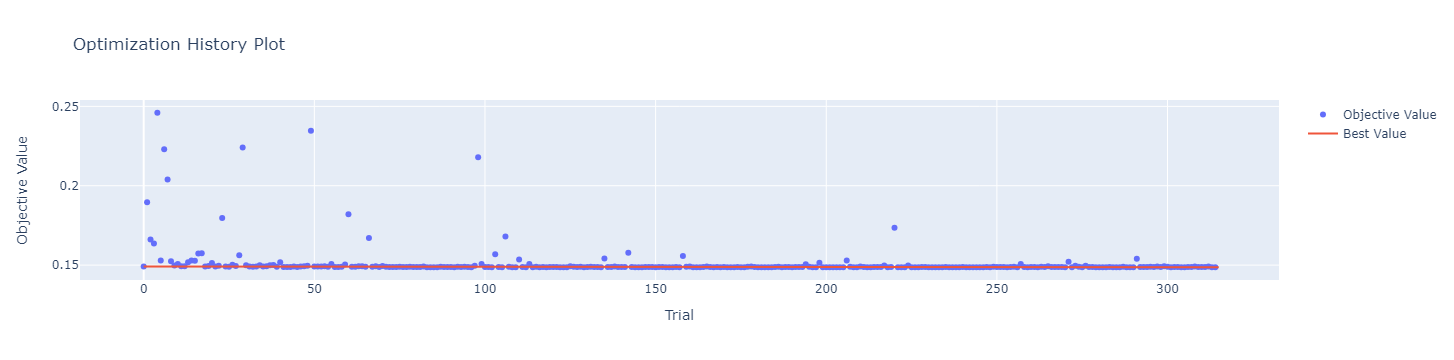

In [123]:
optuna.visualization.plot_optimization_history(study)

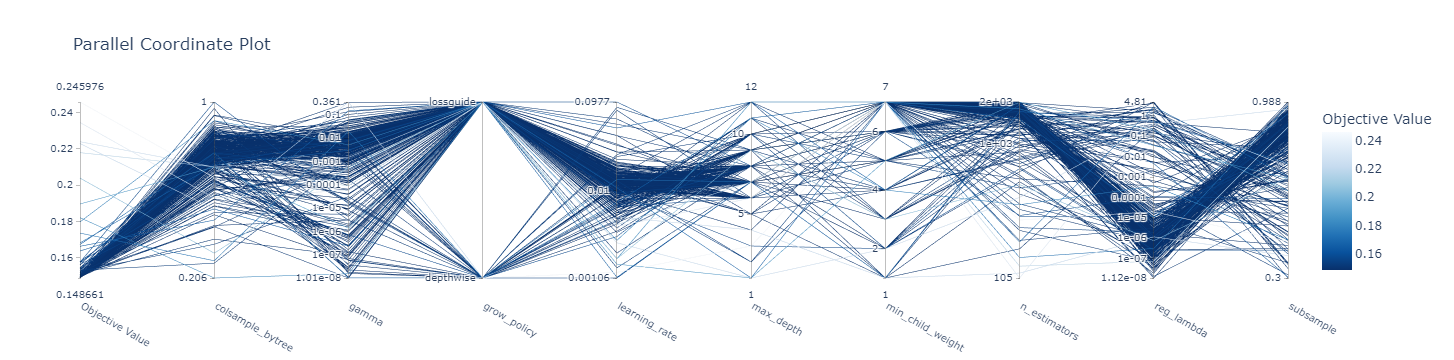

In [124]:
optuna.visualization.plot_parallel_coordinate(study)

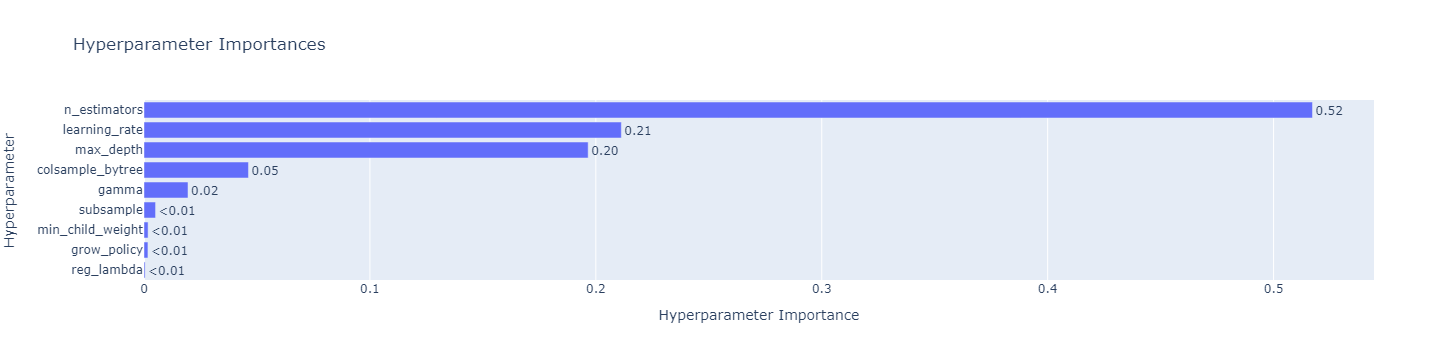

In [127]:
optuna.visualization.plot_param_importances(study)

In [129]:
# optuna.visualization.plot_slice(study)

In [128]:
# optuna.visualization.plot_edf(study)

### Cat model

In [ ]:
def objective(trial):
    params = {
         "verbose": False,
        "iterations": 1000,
        "loss_function":'RMSE',
        "random_state": 0,
        "depth": trial.suggest_int("depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.01, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
    }
    model = CatBoostRegressor(**params)
    score = cross_val_score(model, X, y cv=5, scoring=rmse_scorer, n_jobs=-1)
    return -score.mean()

In [ ]:
study = optuna.create_study(direction = 'minimize', study_name='Cat', sampler=TPESampler)

In [ ]:
study.optimize(objective, n_trials=150)

In [ ]:
cat_params= study.best_params

## Create submission

In [130]:
model = XGBRegressor(**xgb_params) #  you can replace xgb_params on cat_params

In [131]:
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7040803488691738, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.00384362470981977,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.012559225878184923,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1996, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [132]:
predictions = model.predict(X_pred)

In [133]:
submission = pd.DataFrame({
    'id': submit.id,
    'Rings': predictions
    })

In [134]:
submission.to_csv('sub_1486.csv', index=False)

In [39]:
# get importance features

In [135]:
importances = model.feature_importances_

In [136]:
xgb_feat = (pd.Series(importances, index=X.columns).sort_values(ascending=False)).reset_index()

In [137]:
xgb_feat

index         0
0    Shell weight  0.436243
1          Height  0.157202
2           Sex_1  0.130555
3    Whole weight  0.083112
4  Whole weight.1  0.082789
5          Length  0.037364
6        Diameter  0.029705
7  Whole weight.2  0.026765
8           Sex_2  0.016266